# Brief Description

The purpose of this project is quite simple, it is to conduct a classification exercise to put wine into different classes of quality based on multiple variables such as acidity, sugar, alcohol etc.

In [1]:
#Importing relevant libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style('white')
plt.rcParams.update({'figure.figsize':(50,50), 'figure.dpi':100})
%matplotlib inline


# Importing and Exploring the dataset

In [2]:
df_wine = pd.read_csv('WineQT.csv')
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
#checking the data types of the dataframe
df_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [4]:
#converting the quality column data type into a categorical variable
df_wine['quality'] = df_wine['quality'].astype('category')

print(df_wine.dtypes)

fixed acidity            float64
volatile acidity         float64
citric acid              float64
residual sugar           float64
chlorides                float64
free sulfur dioxide      float64
total sulfur dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                 category
Id                         int64
dtype: object


In [5]:
#Checking if there are any missing values in the data
df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [18]:
#Summary statistics
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1597.000000


# Spliting the dataset into train and test to train and predict the model

In [6]:
#Independent and dependent variables
x = df_wine.drop(labels ='quality',
                 axis = 1)
y = df_wine['quality']

#converting to numpy array
x_num = x.to_numpy()
y_num = y.to_numpy()

In [7]:
#checking on the changed data type
df_wine['quality'].dtypes

CategoricalDtype(categories=[3, 4, 5, 6, 7, 8], ordered=False)

In [8]:
#checking shape of the arrays
print(x_num.shape)

print(y_num.shape)

(1143, 12)
(1143,)


In [9]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x_num, y_num, test_size=0.20, random_state=42)

In [10]:
model = RandomForestClassifier(random_state=42)

In [11]:
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
#Predicting the model
y_pred = model.predict(x_test)

# Measuring the performance of the model


In [13]:
#measuring the performance of the model using the classifier report
print(classification_report(y_test, 
                            y_pred, 
                            zero_division=1))

              precision    recall  f1-score   support

           4       1.00      0.00      0.00         6
           5       0.73      0.75      0.74        96
           6       0.63      0.70      0.66        99
           7       0.75      0.58      0.65        26
           8       0.00      0.00      0.00         2

    accuracy                           0.68       229
   macro avg       0.62      0.40      0.41       229
weighted avg       0.69      0.68      0.67       229



**Precision** - This shows the percentage of the correct predictions made, and using the weighted average 69% of the predictions were correct.

**Recall** - This shows the percentage of positive cases that were correctly identified and the weighted average was 69%.

**F1-Score** - This shows the percentage of what positive prediction were correct and using the weighted avverage this was 67%.

In [14]:
#Determining which features are important when determining the quality of the while, sorted from most important to least important
feature_impor = pd.DataFrame({'feature':x.columns, 
                              'importance':model.feature_importances_}).sort_values('importance', 
                                                                                    ascending=False)
feature_impor

,feature,importance
10,alcohol,0.135963
9,sulphates,0.114071
1,volatile acidity,0.099874
6,total sulfur dioxide,0.086672
7,density,0.081455
11,Id,0.081340
4,chlorides,0.077172
8,pH,0.069132
2,citric acid,0.068917
0,fixed acidity,0.067407


# Visualising the Random Forest

In [15]:
model.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1608637542),
 DecisionTreeClassifier(max_features='auto', random_state=1273642419),
 DecisionTreeClassifier(max_features='auto', random_state=1935803228),
 DecisionTreeClassifier(max_features='auto', random_state=787846414),
 DecisionTreeClassifier(max_features='auto', random_state=996406378),
 DecisionTreeClassifier(max_features='auto', random_state=1201263687),
 DecisionTreeClassifier(max_features='auto', random_state=423734972),
 DecisionTreeClassifier(max_features='auto', random_state=415968276),
 DecisionTreeClassifier(max_features='auto', random_state=670094950),
 DecisionTreeClassifier(max_features='auto', random_state=1914837113),
 DecisionTreeClassifier(max_features='auto', random_state=669991378),
 DecisionTreeClassifier(max_features='auto', random_state=429389014),
 DecisionTreeClassifier(max_features='auto', random_state=249467210),
 DecisionTreeClassifier(max_features='auto', random_state=1972458954),
 DecisionTreeC

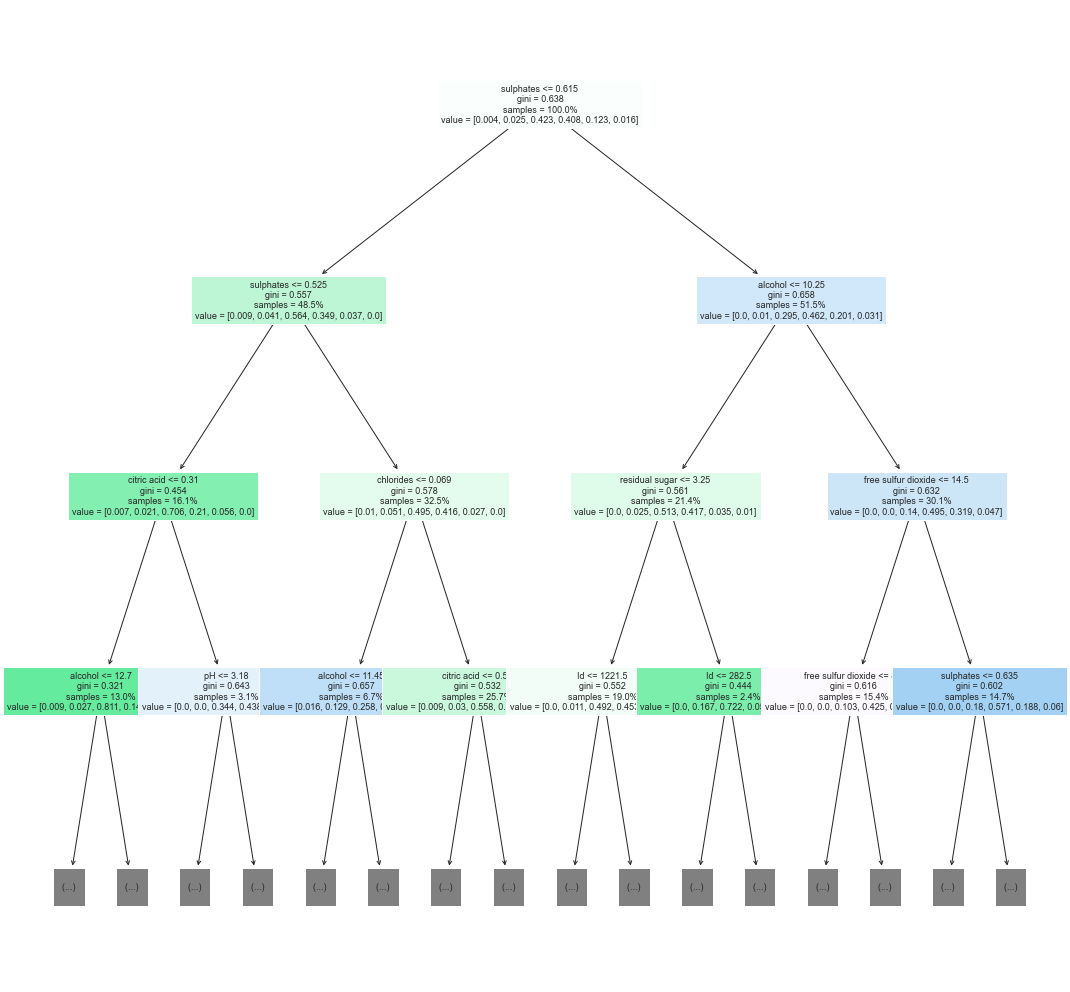

In [16]:
#Plotting the Random Forest with a depth of 3
plt.figure(figsize=(18,18))

tree.plot_tree(model.estimators_[0], 
               filled=True, 
               fontsize=9, 
               max_depth=3, 
               feature_names=x.columns, 
               proportion=True)

plt.show()

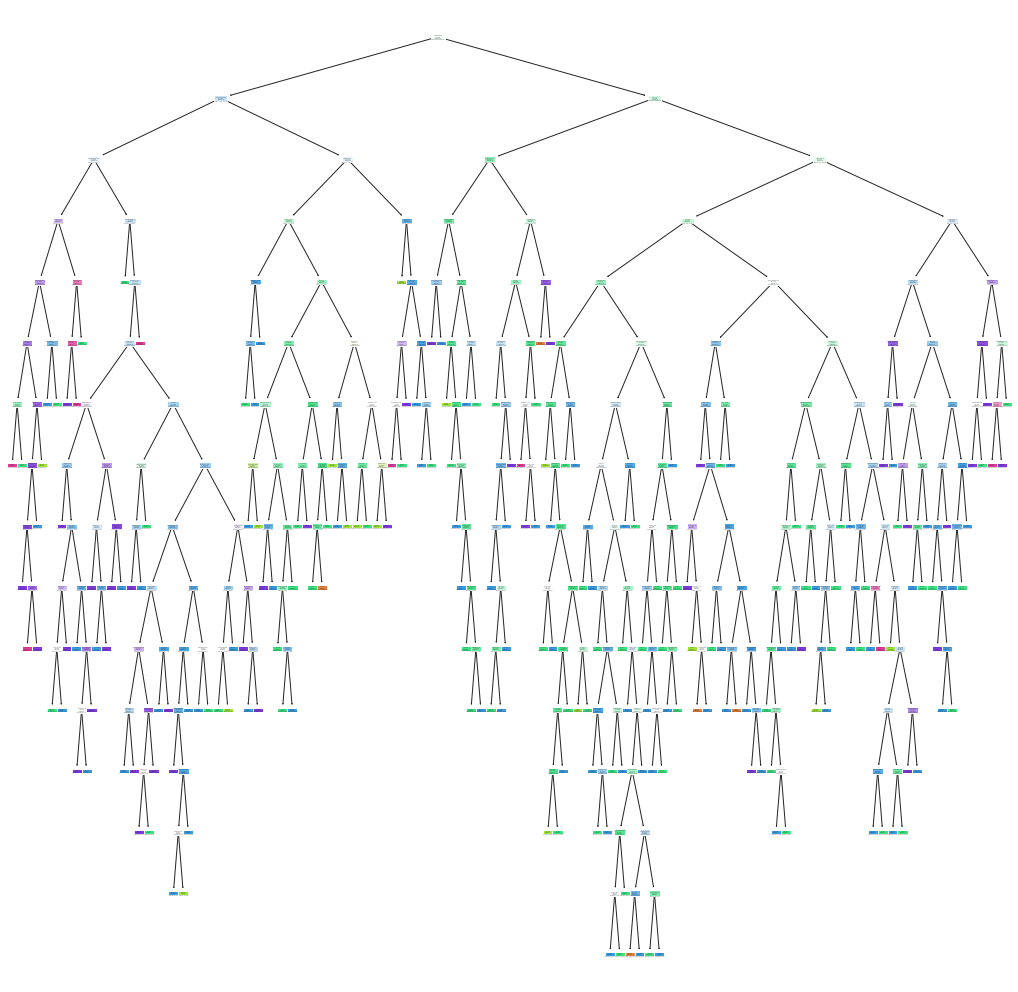

In [17]:
#Full Random Forest
plt.figure(figsize=(18,18))

tree.plot_tree(model.estimators_[2], 
               filled=True, 
               feature_names=x.columns)

plt.show()